# 기말평가 예상문제 답안 ver2

## 1. COVID19 시도별 접종률 시각화 (30점)
아래의 그림은 COVID19 예방접종의 시도별 현황을 캡쳐한 것이다.

이 정보는 특정 주기로 업데이트 되며 아래의 웹페이지 2번째 테이블에서 확인할 수 있다.

https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000


판다스의 `pd.read_html()` 함수를 이용해 위의 페이지에서 그림1의 테이블을 읽어오라. 그리고 folium의 choroplethmap을 활용하여 시도별 2차접종의 접종률을 시각화 하라. 시각화 예시는 그림2와 같다.



In [205]:
import pandas as pd
import numpy as np
import folium
import json
import requests

In [37]:
covid_data=pd.read_html('https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000',encoding='utf-8')

In [38]:
covid19=covid_data[1]
covid19

구분   1차접종             2차접종              3차접종         
    구분  당일 실적     당일 누계  당일 실적     당일 누계   당일 실적    당일 누계
0   합계  50077  42928345  73475  41648826  754680  6052744
1   서울   7970   7989408  11764   7775785  144509  1134791
2   부산   3822   2744824   5168   2659367   52519   373598
3   대구   2320   1910365   3405   1849440   29833   225594
4   인천   2745   2449228   3899   2375153   42563   322895
5   광주   1611   1199058   2744   1158969   18933   166345
6   대전   1417   1182451   2084   1144610   19498   154955
7   울산   1141    915579   1345    888282   13585    99147
8   세종    380    274832    486    264744    3852    34421
9   경기  13040  11239581  17411  10907699  177443  1482127
10  강원   1441   1287979   2479   1251260   27246   209378
11  충북   1385   1360566   2090   1321085   23278   203870
12  충남   1954   1801827   3468   1744713   35002   282085
13  전북   1797   1524970   3541   1482412   33903   269364
14  전남   1755   1584652   3318   1538266   32152   308313
15  경북   2501   2174489   3757   2106352   41451   324553
16  경남   3907   2733661   5573   2645081   50890   390243
17  제주    891    554875    943    535608    8023    71065

In [39]:
covid19_1=covid19.iloc[1:,:].reset_index(drop=True)
covid19_1

구분   1차접종             2차접종              3차접종         
    구분  당일 실적     당일 누계  당일 실적     당일 누계   당일 실적    당일 누계
0   서울   7970   7989408  11764   7775785  144509  1134791
1   부산   3822   2744824   5168   2659367   52519   373598
2   대구   2320   1910365   3405   1849440   29833   225594
3   인천   2745   2449228   3899   2375153   42563   322895
4   광주   1611   1199058   2744   1158969   18933   166345
5   대전   1417   1182451   2084   1144610   19498   154955
6   울산   1141    915579   1345    888282   13585    99147
7   세종    380    274832    486    264744    3852    34421
8   경기  13040  11239581  17411  10907699  177443  1482127
9   강원   1441   1287979   2479   1251260   27246   209378
10  충북   1385   1360566   2090   1321085   23278   203870
11  충남   1954   1801827   3468   1744713   35002   282085
12  전북   1797   1524970   3541   1482412   33903   269364
13  전남   1755   1584652   3318   1538266   32152   308313
14  경북   2501   2174489   3757   2106352   41451   324553
15  경남   3907   2733661   5573   2645081   50890   390243
16  제주    891    554875    943    535608    8023    71065

In [40]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv')
df

,행정구역(시군구)별,총인구수 (명)
0,서울특별시,9532428
1,부산광역시,3356311
2,대구광역시,2390721
3,인천광역시,2945009
4,광주광역시,1442454
5,대전광역시,1454228
6,울산광역시,1122566
7,세종특별자치시,368276
8,경기도,13549577
9,강원도,1537717


In [41]:
df2=pd.DataFrame({'province':df.iloc[:,0],'total':df.iloc[:,1],'vaccine':covid19_1.iloc[:,4]})
df2

,province,total,vaccine
0,서울특별시,9532428,7775785
1,부산광역시,3356311,2659367
2,대구광역시,2390721,1849440
3,인천광역시,2945009,2375153
4,광주광역시,1442454,1158969
5,대전광역시,1454228,1144610
6,울산광역시,1122566,888282
7,세종특별자치시,368276,264744
8,경기도,13549577,10907699
9,강원도,1537717,1251260


In [42]:
df2['proportion']=df2['vaccine']/df2['total']
df2

,province,total,vaccine,proportion
0,서울특별시,9532428,7775785,0.815719
1,부산광역시,3356311,2659367,0.792348
2,대구광역시,2390721,1849440,0.773591
3,인천광역시,2945009,2375153,0.806501
4,광주광역시,1442454,1158969,0.803470
5,대전광역시,1454228,1144610,0.787091
6,울산광역시,1122566,888282,0.791296
7,세종특별자치시,368276,264744,0.718874
8,경기도,13549577,10907699,0.805021
9,강원도,1537717,1251260,0.813713


In [43]:
global_distriction_jsonurl='https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json'
global_dict = json.loads(requests.get(global_distriction_jsonurl).text)

In [44]:
[global_dict['features'][i]['properties']['name'] for i in range(17)]

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [2]:
import plotly.express as px
from IPython.display import HTML

In [46]:
m = folium.Map([35.84195368311022, 127.1155556693179],zoom_start=7,scrollWheelZoom=False)
choro = folium.Choropleth(
    data=df2, 
    geo_data=global_dict,
    columns=['province','proportion'],
    key_on = 'feature.properties.name'
)
choro.add_to(m) 
#m

## 2. COVID19 시도별/월별 확산과정 시각화 (40점)

아래는 COVID19 확진자수를 지역별로 매일 기록한 자료이다.

https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv


일별로 기록된 COVID19 확진자수를 월별로 통합한 뒤 2021-01 ~ 2021-10 기간의 발생률을 계산하여 시각화하라. 시각화는 `plotly`의 `choropleth_mapbox`를 이용하며 시간의 추이를 표현하기 위해 `animation_frame` 옵션을 사용한다. 시각화 예시는 아래와 같다.



In [12]:
import folium 
import pandas as pd 
import numpy as np
import json 
import requests 

In [13]:
import plotly.express as px
from IPython.display import HTML

In [14]:
covid_example=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv')
covid_example

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,누적(명),"457,612","158,774","16,555","19,114","25,299","6,353","8,809","5,675","1,588","136,546","8,889","8,942","13,174","6,453","4,498","11,471","15,236","3,762","6,474"
1,2020-01-20,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-21,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-22,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-23,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2021-11-28,"3,925","1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35,10
680,2021-11-29,"3,308","1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44,3
681,2021-11-30,"3,032","1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22,8
682,2021-12-01,"5,123","2,222",143,86,326,29,88,17,20,"1,582",105,48,96,50,40,97,127,27,20


In [15]:
covid_example.columns

Index(['일자', '계(명)', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기',
       '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

In [16]:
covid_ver1=covid_example.iloc[348:652,:].replace('-','0').\
iloc[:,map(lambda x: x != '계(명)' and x != '검역', covid_example.columns)].\
set_index('일자').applymap(lambda x: float(x.replace(',',''))).reset_index().\
melt(id_vars='일자')
covid_ver1

,일자,variable,value
0,2021-01-01,서울,357.0
1,2021-01-02,서울,250.0
2,2021-01-03,서울,198.0
3,2021-01-04,서울,329.0
4,2021-01-05,서울,199.0
...,...,...,...
5163,2021-10-27,제주,7.0
5164,2021-10-28,제주,4.0
5165,2021-10-29,제주,4.0
5166,2021-10-30,제주,9.0


In [17]:
for i in range(len(covid_ver1)):
    covid_ver1['일자'][i]=covid_ver1['일자'][i][:7]

C:\Users\HSY\AppData\Local\Temp/ipykernel_27136/276931057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_ver1['일자'][i]=covid_ver1['일자'][i][:7]


In [24]:
covid_ver1.groupby(['일자','variable']).agg(np.sum)

value
일자      variable        
2021-01 강원         488.0
        경기        5353.0
        경남         686.0
        경북         593.0
        광주         702.0
...                  ...
2021-10 전남         459.0
        전북         672.0
        제주         225.0
        충남        1467.0
        충북        1556.0

[170 rows x 1 columns]

In [25]:
covid_ver1.groupby(['일자','variable']).agg(np.sum).stack().reset_index().\
iloc[:,[0,1,3]].rename(columns={'일자':'ym','variable':'prov',0:'covid19'}).query('ym=="2021-01"')

,ym,prov,covid19
0,2021-01,강원,488.0
1,2021-01,경기,5353.0
2,2021-01,경남,686.0
3,2021-01,경북,593.0
4,2021-01,광주,702.0
5,2021-01,대구,507.0
6,2021-01,대전,252.0
7,2021-01,부산,889.0
8,2021-01,서울,5160.0
9,2021-01,세종,47.0


In [26]:
covid_ver1=covid_ver1.groupby(['일자','variable']).agg(np.sum).stack().reset_index().\
iloc[:,[0,1,3]].rename(columns={'일자':'ym','variable':'prov',0:'covid19'})
covid_ver1

,ym,prov,covid19
0,2021-01,강원,488.0
1,2021-01,경기,5353.0
2,2021-01,경남,686.0
3,2021-01,경북,593.0
4,2021-01,광주,702.0
...,...,...,...
165,2021-10,전남,459.0
166,2021-10,전북,672.0
167,2021-10,제주,225.0
168,2021-10,충남,1467.0


In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv')\
.sort_values('행정구역(시군구)별').reset_index().iloc[:,1:]
df

,행정구역(시군구)별,총인구수 (명)
0,강원도,1537717
1,경기도,13549577
2,경상남도,3318161
3,경상북도,2627925
4,광주광역시,1442454
5,대구광역시,2390721
6,대전광역시,1454228
7,부산광역시,3356311
8,서울특별시,9532428
9,세종특별자치시,368276


In [28]:
df2=pd.concat([df,df,df,df,df,df,df,df,df,df]).reset_index().iloc[:,1:]
df2

,행정구역(시군구)별,총인구수 (명)
0,강원도,1537717
1,경기도,13549577
2,경상남도,3318161
3,경상북도,2627925
4,광주광역시,1442454
...,...,...
165,전라남도,1834653
166,전라북도,1789770
167,제주특별자치도,676569
168,충청남도,2118977


In [29]:
covid_ver2=pd.concat([covid_ver1,df2],axis=1).iloc[:,[0,2,3,4]].\
rename(columns={'행정구역(시군구)별':'prov','총인구수 (명)':'total'})
covid_ver2['prop']=covid_ver2['covid19']/covid_ver2['total']
covid_ver2

,ym,covid19,prov,total,prop
0,2021-01,488.0,강원도,1537717,0.000317
1,2021-01,5353.0,경기도,13549577,0.000395
2,2021-01,686.0,경상남도,3318161,0.000207
3,2021-01,593.0,경상북도,2627925,0.000226
4,2021-01,702.0,광주광역시,1442454,0.000487
...,...,...,...,...,...
165,2021-10,459.0,전라남도,1834653,0.000250
166,2021-10,672.0,전라북도,1789770,0.000375
167,2021-10,225.0,제주특별자치도,676569,0.000333
168,2021-10,1467.0,충청남도,2118977,0.000692


In [30]:
covid_ver2=covid_ver2.sort_values(['prov','ym']).reset_index().iloc[:,1:]
covid_ver2

,ym,covid19,prov,total,prop
0,2021-01,488.0,강원도,1537717,0.000317
1,2021-02,169.0,강원도,1537717,0.000110
2,2021-03,466.0,강원도,1537717,0.000303
3,2021-04,354.0,강원도,1537717,0.000230
4,2021-05,501.0,강원도,1537717,0.000326
...,...,...,...,...,...
165,2021-06,363.0,충청북도,1596948,0.000227
166,2021-07,544.0,충청북도,1596948,0.000341
167,2021-08,1302.0,충청북도,1596948,0.000815
168,2021-09,1192.0,충청북도,1596948,0.000746


In [31]:
json_korea_prov='https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json'
json_korea = json.loads(requests.get(json_korea_prov).text)
[json_korea['features'][i]['properties']['name'] for i in range(17)]

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [35]:
fig = px.choropleth_mapbox(covid_ver2,  ### 데이터프레임 
                           geojson=json_korea, ### json파일 
                           color="prop", ### df에서 코로플레스의 단계를 표시 
                           locations="prov", ### df에 존재하는 연결변수
                           animation_frame="ym",
                           featureidkey="properties.name", ### json에 존재하는 연결매개체
                           center={"lat": 36, "lon": 128}, 
                           mapbox_style="carto-positron",
                           range_color=(0, covid_ver2.prop.max()),
                           height=1200,
                           zoom=6.5)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show(config=dict({'scrollZoom':False}))
#_html=fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False}))
#HTML(_html)

- 시각화를 수행하는 코드를 따로 주석처리하였음.

## 3. COVID19 시도별/일별 감염자수 시각화 (20점)

아래는 COVID19 확진자수를 지역별로 매일 기록한 자료이다. (#2와 동일한 자료임)

다음을 잘 읽고 시각화 하라.

`(1)` 코로나 확진자 현황을 line plot으로 시각화라. 도시별로 별도의 lineplot을 그리고 x축은 요일, y축은 확진자수로 설정하라. 시각화도구는 판다스데이터프레임의 `.plot()` 메소드를 사용하고 backend는 `matplotlib`을 이용하라. 시각화 예시는 아래와 같다.

In [47]:
covid_example=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv')
covid_example

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,누적(명),"457,612","158,774","16,555","19,114","25,299","6,353","8,809","5,675","1,588","136,546","8,889","8,942","13,174","6,453","4,498","11,471","15,236","3,762","6,474"
1,2020-01-20,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-21,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-22,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-23,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2021-11-28,"3,925","1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35,10
680,2021-11-29,"3,308","1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44,3
681,2021-11-30,"3,032","1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22,8
682,2021-12-01,"5,123","2,222",143,86,326,29,88,17,20,"1,582",105,48,96,50,40,97,127,27,20


In [48]:
json_korea_prov='https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json'
json_korea = json.loads(requests.get(json_korea_prov).text)
[json_korea['features'][i]['properties']['name_eng'] for i in range(17)]

['Seoul',
 'Busan',
 'Daegu',
 'Incheon',
 'Gwangju',
 'Daejeon',
 'Ulsan',
 'Sejongsi',
 'Gyeonggi-do',
 'Gangwon-do',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Jeollabuk-do',
 'Jeollanam-do',
 'Gyeongsangbuk-do',
 'Gyeongsangnam-do',
 'Jeju-do']

In [49]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import warnings
from IPython.display import HTML
from pandas_datareader import data as pdr

In [50]:
covid_ver1=covid_example.iloc[1:,:].replace('-','0').\
iloc[:,map(lambda x: x != '계(명)' and x != '검역', covid_example.columns)].\
set_index('일자').applymap(lambda x: float(x.replace(',',''))).reset_index()
covid_ver1

,일자,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2020-01-20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2021-11-28,1673.0,148.0,106.0,278.0,52.0,53.0,4.0,5.0,1090.0,63.0,25.0,121.0,45.0,25.0,103.0,89.0,35.0
679,2021-11-29,1393.0,144.0,88.0,233.0,61.0,43.0,2.0,15.0,910.0,56.0,33.0,52.0,49.0,28.0,68.0,86.0,44.0
680,2021-11-30,1186.0,79.0,78.0,192.0,52.0,43.0,3.0,22.0,909.0,84.0,59.0,81.0,50.0,36.0,68.0,60.0,22.0
681,2021-12-01,2222.0,143.0,86.0,326.0,29.0,88.0,17.0,20.0,1582.0,105.0,48.0,96.0,50.0,40.0,97.0,127.0,27.0


In [51]:
newname = [json_korea['features'][i]['properties']['name_eng'] for i in range(17)]
for i in range(len(newname)):
    covid_ver1=covid_ver1.rename(columns={covid_ver1.columns[i+1]:newname[i]})
    
covid_ver1=covid_ver1.rename(columns={'일자':'Date'})
covid_ver1

,Date,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejongsi,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2021-11-28,1673.0,148.0,106.0,278.0,52.0,53.0,4.0,5.0,1090.0,63.0,25.0,121.0,45.0,25.0,103.0,89.0,35.0
679,2021-11-29,1393.0,144.0,88.0,233.0,61.0,43.0,2.0,15.0,910.0,56.0,33.0,52.0,49.0,28.0,68.0,86.0,44.0
680,2021-11-30,1186.0,79.0,78.0,192.0,52.0,43.0,3.0,22.0,909.0,84.0,59.0,81.0,50.0,36.0,68.0,60.0,22.0
681,2021-12-01,2222.0,143.0,86.0,326.0,29.0,88.0,17.0,20.0,1582.0,105.0,48.0,96.0,50.0,40.0,97.0,127.0,27.0


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

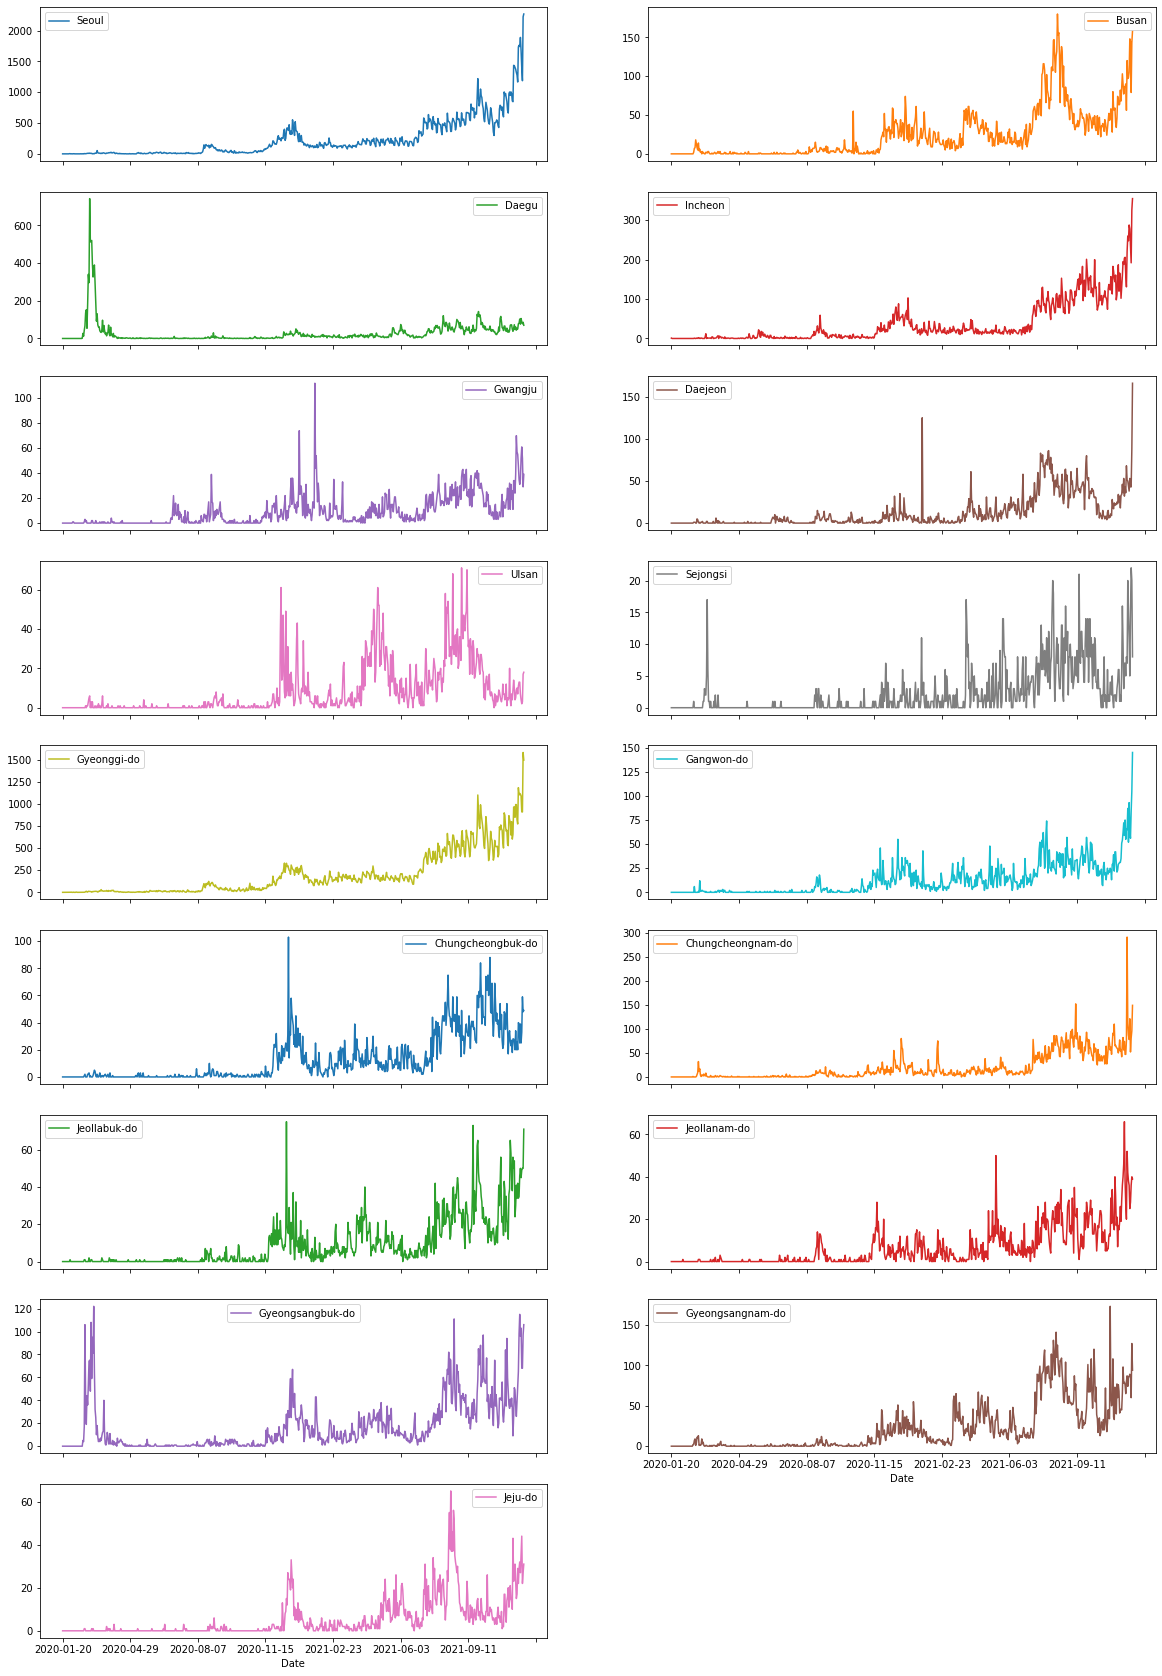

In [52]:
covid_ver1.plot.line(x='Date',figsize=(20,30),subplots=True,layout=(9,2))

`(2)` `(1)`과 같은 시각화를 `plotly backend`를 이용하여 시각화 하라. 시각화 예시는 아래와 같다.

In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def show(fig): 
    return HTML(fig.to_html(include_plotlyjs='cdn',include_mathjax=False, config=dict({'scrollZoom':False})))

In [54]:
covid_ver2=covid_ver1.melt(id_vars='Date').rename(columns={'variable':'prov','value':'covid19'})
covid_ver2

,Date,prov,covid19
0,2020-01-20,Seoul,0.0
1,2020-01-21,Seoul,0.0
2,2020-01-22,Seoul,0.0
3,2020-01-23,Seoul,0.0
4,2020-01-24,Seoul,1.0
...,...,...,...
11606,2021-11-28,Jeju-do,35.0
11607,2021-11-29,Jeju-do,44.0
11608,2021-11-30,Jeju-do,22.0
11609,2021-12-01,Jeju-do,27.0


In [56]:
fig=covid_ver2.plot.line(x='Date', y='covid19', facet_col='prov', color='prov',
                         facet_col_wrap=3, facet_col_spacing=0.04, backend='plotly', height=2000)
#fig.update_yaxes(matches=None,showticklabels=True)
#fig.show(config=dict({'scrollZoom':False}))
#show(fig)

## 4. FIFA22 시각화 (20점)

아래는 `FIFA22`라는 온라인게임에서 선수들의 능력치가 저정된 url이다.

https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv

판다스를 이용하여 위의 데이터를 불러온 이후 물음에 답하라.


In [3]:
fifa22=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
fifa22

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


`(1)` 한국선수와 일본선수간 평균능력치를 barplot을 이용하여 비교하라. 비교하고 싶은 능력치의 목록은 아래와 같다.

In [4]:
abilities=['Crossing', 'Finishing','HeadingAccuracy','ShortPassing',
           'Volleys', 'Dribbling','Curve','FKAccuracy',
           'LongPassing','BallControl', 'Acceleration','SprintSpeed',
           'Agility', 'Reactions','Balance','ShotPower', 
           'Jumping', 'Stamina', 'Strength','LongShots',
           'Aggression','Interceptions', 'Positioning','Vision',
           'Penalties', 'Composure', 'StandingTackle','SlidingTackle']

In [5]:
fifa22_kj=fifa22.query(' (Nationality=="Korea Republic") or (Nationality=="Japan") ')
fifa22_kj

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
129,200104,H. Son,28,https://cdn.sofifa.com/players/200/104/22_60.png,Korea Republic,https://cdn.sofifa.com/flags/kr.png,89,89,Tottenham Hotspur,https://cdn.sofifa.com/teams/18/30.png,...,33.0,11.0,13.0,13.0,6.0,10.0,LM,89.0,€197.6M,50.0
616,232905,J. Ito,28,https://cdn.sofifa.com/players/232/905/22_60.png,Japan,https://cdn.sofifa.com/flags/jp.png,77,77,KRC Genk,https://cdn.sofifa.com/teams/673/30.png,...,56.0,13.0,12.0,15.0,5.0,7.0,RW,77.0,€15.8M,54.0
695,233670,A. Fukumori,28,https://cdn.sofifa.com/players/233/670/22_60.png,Japan,https://cdn.sofifa.com/flags/jp.png,73,73,Hokkaido Consadole Sapporo,https://cdn.sofifa.com/teams/112444/30.png,...,72.0,13.0,10.0,8.0,7.0,5.0,CDM,74.0,€3.3M,72.0
850,199183,Kim Bo Kyung,31,https://cdn.sofifa.com/players/199/183/22_60.png,Korea Republic,https://cdn.sofifa.com/flags/kr.png,72,72,Jeonbuk Hyundai Motors,https://cdn.sofifa.com/teams/1477/30.png,...,55.0,12.0,15.0,10.0,13.0,13.0,CAM,74.0,€2.5M,59.0
960,233147,R. Oshima,28,https://cdn.sofifa.com/players/233/147/22_60.png,Japan,https://cdn.sofifa.com/flags/jp.png,71,71,Kawasaki Frontale,https://cdn.sofifa.com/teams/111730/30.png,...,58.0,12.0,6.0,11.0,6.0,10.0,CAM,72.0,€2.5M,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16468,241223,21 S. Mogi,21,https://cdn.sofifa.com/players/241/223/21_60.png,Japan,https://cdn.sofifa.com/flags/jp.png,59,68,Cerezo Osaka,https://cdn.sofifa.com/teams/101148/30.png,...,11.0,60.0,55.0,57.0,54.0,62.0,GK,59.0,€675K,14.0
16469,251157,Lee Gwang Yeon,21,https://cdn.sofifa.com/players/251/157/22_60.png,Korea Republic,https://cdn.sofifa.com/flags/kr.png,60,71,Gangwon FC,https://cdn.sofifa.com/teams/112115/30.png,...,12.0,60.0,60.0,54.0,63.0,61.0,GK,60.0,€689K,8.0
16593,257100,I. Takahashi,17,https://cdn.sofifa.com/players/257/100/22_60.png,Japan,https://cdn.sofifa.com/flags/jp.png,54,74,Vissel Kobe,https://cdn.sofifa.com/teams/101146/30.png,...,10.0,57.0,50.0,52.0,44.0,61.0,GK,54.0,€575K,10.0
16648,252658,Baek Jong Beom,20,https://cdn.sofifa.com/players/252/658/22_60.png,Korea Republic,https://cdn.sofifa.com/flags/kr.png,51,66,FC Seoul,https://cdn.sofifa.com/teams/982/30.png,...,13.0,49.0,50.0,51.0,48.0,55.0,GK,51.0,€225K,10.0


In [6]:
fifa22_kj_mean=fifa22_kj.groupby('Nationality').agg(np.mean)
fifa22_kj_mean

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
Nationality,,,,,,,,,,,,,,,,,,,,,
Japan,234079.901408,26.084507,66.478873,70.718310,1655.024648,1.088028,3.161972,2.468310,18.366197,54.419014,...,38.666667,48.475352,45.373239,13.813380,13.866197,13.852113,13.679577,14.021127,67.542254,46.640569
Korea Republic,219806.491525,27.158192,65.457627,69.186441,1621.881356,1.124294,3.344633,2.553672,23.169492,49.757062,...,42.000000,46.627119,44.282486,16.079096,15.740113,15.570621,15.926554,16.853107,66.401130,46.577143


In [7]:
fifa22_kj_final=fifa22_kj_mean[abilities]
fifa22_kj_final

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle
Nationality,,,,,,,,,,,,,,,,,,,,,
Japan,54.419014,50.665493,51.066901,62.348592,46.538732,59.528169,51.179577,46.570423,57.496479,62.285211,...,62.538732,51.570423,54.742958,46.552817,55.338028,58.003521,48.739437,58.926056,48.475352,45.373239
Korea Republic,49.757062,47.740113,51.689266,58.762712,43.683616,55.819209,48.519774,45.632768,53.372881,57.700565,...,65.231638,48.943503,56.079096,47.474576,54.621469,57.271186,47.966102,58.482955,46.627119,44.282486


In [8]:
fifa22_kj_final=fifa22_kj_final.reset_index().melt(id_vars='Nationality').rename(columns={'variable':'ability'})
fifa22_kj_final

,Nationality,ability,value
0,Japan,Crossing,54.419014
1,Korea Republic,Crossing,49.757062
2,Japan,Finishing,50.665493
3,Korea Republic,Finishing,47.740113
4,Japan,HeadingAccuracy,51.066901
5,Korea Republic,HeadingAccuracy,51.689266
6,Japan,ShortPassing,62.348592
7,Korea Republic,ShortPassing,58.762712
8,Japan,Volleys,46.538732
9,Korea Republic,Volleys,43.683616


In [10]:
fig=fifa22_kj_final.plot.barh(x='value',y='ability',color='Nationality',backend='plotly',text='value',barmode='group',height=1500)
#fig.show(config=dict({'scrollZoom':False}))

`(2)` 선수들의 Overall의 평균값이 가장 높은 상위 20개의 나라와 선수의 수가 가장 많은 상위 20개의 나라의 교집합을 구하라. 이 나라들에 한정하여 선수들의 평균연령(Age)을 계산한 뒤 평균연령을 정렬하고 barplot으로 시각화 하라. (시각화 패키지는 본인이 선호하는 패키지 사용)

In [23]:
_df_Overall_mean=fifa22.groupby('Nationality').agg(np.mean).reset_index().\
sort_values('Overall',ascending=False).reset_index(drop=True) #Overall 기준
_df_Overall_mean['Overall_Highlight']=_df_Overall_mean['Overall']>=_df_Overall_mean['Overall'][19]
Overall_20=set(_df_Overall_mean['Nationality'][_df_Overall_mean['Overall_Highlight']==True])
Overall_20

{'Algeria',
 'Argentina',
 'Brazil',
 'Cape Verde Islands',
 'Central African Republic',
 'Croatia',
 'Czech Republic',
 'Egypt',
 'Fiji',
 'Gabon',
 'Libya',
 'Mozambique',
 'Namibia',
 'Portugal',
 'Russia',
 'Serbia',
 'Syria',
 'Tanzania',
 'Ukraine',
 'Uruguay'}

In [22]:
_df_number=fifa22.groupby('Nationality').agg(len).reset_index().\
sort_values('ID',ascending=False).reset_index(drop=True) #선수의 수 기준
_df_number['Number_Highlight']=_df_number['ID']>=_df_number['ID'][19]
Number_20=set(_df_number['Nationality'][_df_number['Number_Highlight']==True])
Number_20

{'Argentina',
 'Belgium',
 'Brazil',
 'Colombia',
 'Denmark',
 'England',
 'France',
 'Germany',
 'Italy',
 'Japan',
 'Mexico',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Scotland',
 'Spain',
 'Sweden',
 'United States'}

In [24]:
Overall_20.intersection(Number_20)

{'Argentina', 'Brazil', 'Portugal'}

In [32]:
fifa22_final2=fifa22.iloc[map(lambda x: x in Overall_20.intersection(Number_20),fifa22.Nationality),:].\
groupby('Nationality').agg(np.mean).reset_index()
fifa22_final2

,Nationality,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
0,Argentina,217315.664303,27.255319,70.309693,74.251773,1726.297872,1.198582,2.986998,2.609929,17.393617,...,49.311111,50.726950,48.669822,14.619385,14.627660,14.849882,14.800236,14.828605,71.100473,49.669164
1,Brazil,214748.107448,26.927961,72.411477,74.910867,1753.291819,1.289377,2.993895,2.719170,21.150551,...,46.915888,50.957265,48.313653,15.192918,14.793651,15.355311,15.094017,15.307692,73.045177,49.959270
2,Portugal,219684.333333,25.692090,70.635593,75.545198,1720.392655,1.271186,3.062147,2.740113,26.725989,...,55.312500,52.254237,49.262108,15.525424,15.646893,15.274011,15.330508,15.867232,71.562147,50.000000


In [37]:
fig=fifa22_final2.plot.bar(x='Nationality',y='Age',color='Nationality',backend='plotly',text='Age',barmode='group',height=700)
#fig.show(config=dict({'scrollZoom':False}))

## 5. 정권별 GDP/소득불균형 시각화 (20점)

아래는 한 가상국가의 최근 18년간 GDP와 불평등지수이다.

In [38]:
pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df1.csv')

,GDP,Inequality,Government
0,500,56,A
1,550,58,A
2,530,59,A
3,480,61,A
4,550,64,A
5,550,64,B
6,750,66,B
7,560,68,B
8,800,70,B
9,900,65,B


그리고 아래는 각 정권별 평균 인구수를 기록한 것이다. (단위천)

In [39]:
pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df2.csv',index_col=0)

,A,B,C,D
pop,54232.213,48823.432,46823.453,45232.119


`(1)` 정권의 GDP와 불평등지수를 시각화하고 정권은 색깔별로 구분하라. 선의 두께는 인구수에 따라 다르게 나타내라. 시각화 예시는 아래와 같다.

In [40]:
df1=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df1.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df2.csv',index_col=0)

In [41]:
from plotnine import *

In [43]:
df2.melt().rename(columns={'variable':'Government','value':'pop'})

,Government,pop
0,A,54232.213
1,B,48823.432
2,C,46823.453
3,D,45232.119


In [47]:
df3=pd.merge(df1,df2.melt().rename(columns={'variable':'Government','value':'pop'}))
df3

,GDP,Inequality,Government,pop
0,500,56,A,54232.213
1,550,58,A,54232.213
2,530,59,A,54232.213
3,480,61,A,54232.213
4,550,64,A,54232.213
5,550,64,B,48823.432
6,750,66,B,48823.432
7,560,68,B,48823.432
8,800,70,B,48823.432
9,900,65,B,48823.432


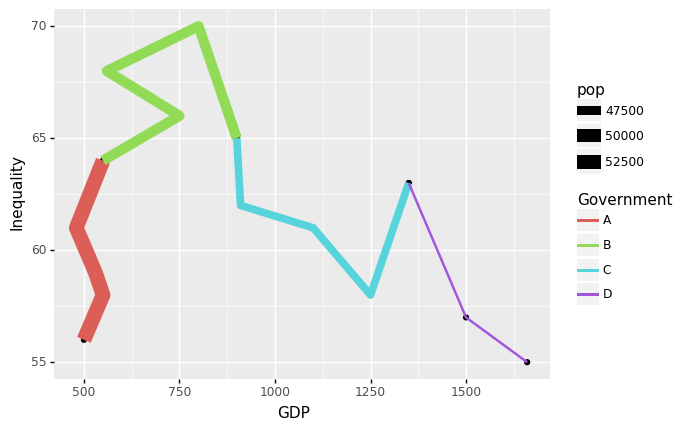

<ggplot: (140473626781)>

In [50]:
ggplot(df3)+geom_point(aes(x='GDP',y='Inequality'))+\
geom_path(aes(x='GDP',y='Inequality',size='pop',color='Government'))

`(2)` 정권 A,C는 진보성향의 정권이며 정권 B,D는 보수성향의 정권이다. 아래의 데이터프레임을 이용하여 적절한 tidyset을 새로 만들고 정권의 성향을 선의 타입으로 나타내라.

In [51]:
pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df3.csv',index_col=0)

,type
A,prog
B,cons
C,prog
D,cons


In [52]:
df4=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df3.csv',index_col=0)

In [55]:
df5=pd.merge(df3,df4.reset_index().rename(columns={'index':'Government'}))
df5

,GDP,Inequality,Government,pop,type
0,500,56,A,54232.213,prog
1,550,58,A,54232.213,prog
2,530,59,A,54232.213,prog
3,480,61,A,54232.213,prog
4,550,64,A,54232.213,prog
5,550,64,B,48823.432,cons
6,750,66,B,48823.432,cons
7,560,68,B,48823.432,cons
8,800,70,B,48823.432,cons
9,900,65,B,48823.432,cons


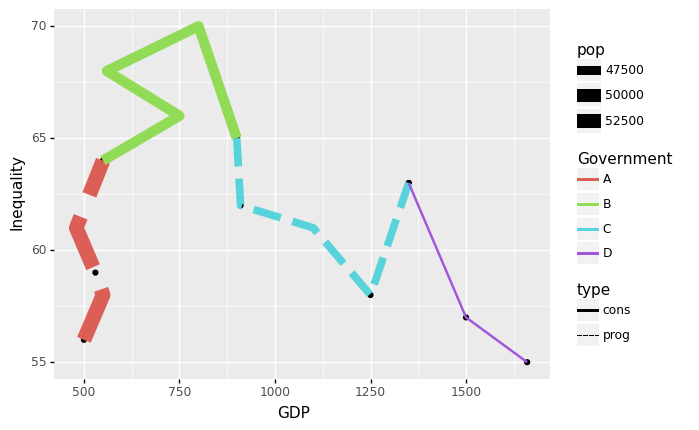

<ggplot: (140473582481)>

In [56]:
ggplot(df5)+geom_point(aes(x='GDP',y='Inequality'))+\
geom_path(aes(x='GDP',y='Inequality',size='pop',color='Government',linetype='type'))

## 6. 핸드폰 판매량 시각화 (50점)

아래는 제조사별 핸드폰 판매량이다.

In [121]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


아래를 잘 읽고 물음에 답하라. (주의: 모든 그림은 판다스백엔드를 이용하여 시각하고 backend는 matplotlib를 이용한다.)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import HTML

`(1)` 제조사별 판매량을 lineplot으로 시각화 하라.

Note
- x축에 Date, y축에 판매량 설정
- 그림의 크기를 (10,7)로 설정

<AxesSubplot:xlabel='Date'>

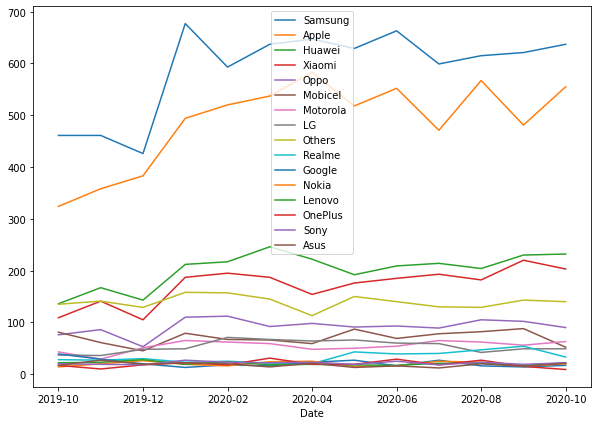

In [61]:
df.plot.line(x='Date',figsize=(10,7))

`(2)` 제조사별 판매량을 lineplot으로 시각화 하라.

Note

- x축에 Date, y축에 판매량을 설정
- subplot을 이용
- 그림의 크기는 (10,15)로 설정

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

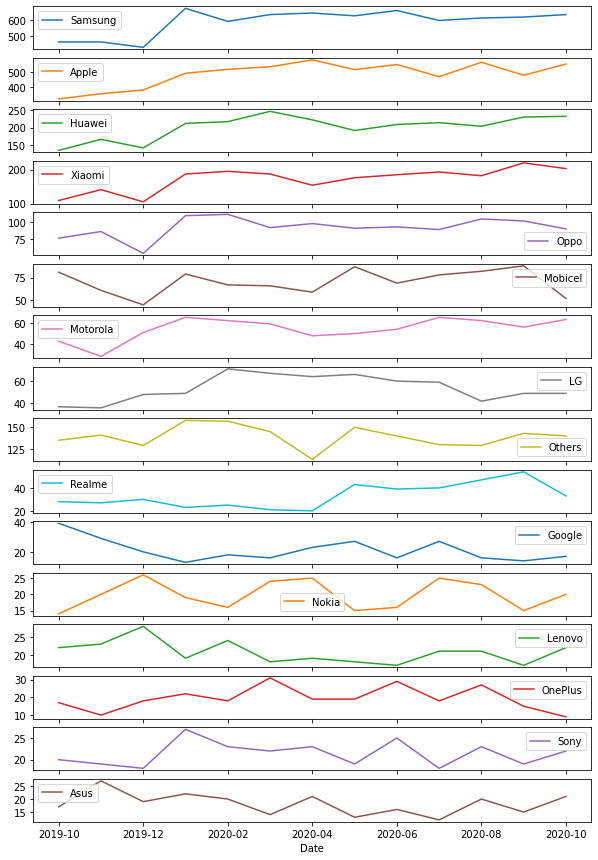

In [62]:
df.plot.line(x='Date',figsize=(10,15),subplots=True)

`(3)` 제조사별 판매량을 조사하고 barplot으로 시각화 하라.

Note
- 누적판매량이 높은 기업부터 정렬하여 시각화


In [70]:
df1=df.set_index('Date').sum().reset_index().rename(columns={'index':'company',0:'mobile'}).\
sort_values('mobile',ascending=False).reset_index(drop=True) 
df1

,company,mobile
0,Samsung,7666
1,Apple,6343
2,Huawei,2624
3,Xiaomi,2237
4,Others,1810
5,Oppo,1197
6,Mobicel,914
7,Motorola,707
8,LG,697
9,Realme,430


array([<AxesSubplot:title={'center':'mobile'}, xlabel='company'>],
      dtype=object)

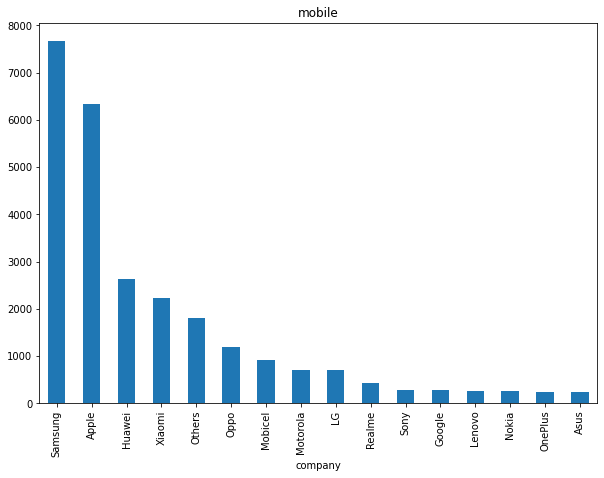

In [72]:
df1.plot.bar(x='company',y='mobile',figsize=(10,7),subplots=True,legend=False)

`(4)` 2019년 제조사별 점유율을 조사하고 pieplot으로 시각화 하라.

In [106]:
df2=df.iloc[:3,:].sum().reset_index().iloc[1:,:].rename(columns={'index':'company',0:'mobile'}) #2019년 판매량 총합
df2['2019total']=sum(df2['mobile'])
df2['rate']=df2['mobile']/df2['2019total']
df2=df2.iloc[:,[0,3]].set_index('company')
df2

,rate
company,
Samsung,0.284628
Apple,0.224873
Huawei,0.094172
Xiaomi,0.074958
Oppo,0.045397
Mobicel,0.039485
Motorola,0.025971
LG,0.025549
Others,0.085515


<AxesSubplot:ylabel='rate'>

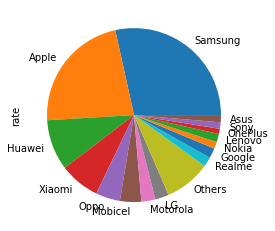

In [107]:
df2.plot.pie(y='rate',legend=False)

`(5)` 2019년과 2020년의 월별판매량의 평균을 구하고 바플랏으로 비교하라.

In [122]:
df['year']=[df['Date'][i][:4] for i in range(len(df))]
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus,year
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17,2019
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27,2019
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19,2019
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22,2020
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20,2020
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14,2020
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21,2020
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13,2020
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16,2020
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12,2020


<AxesSubplot:xlabel='year'>

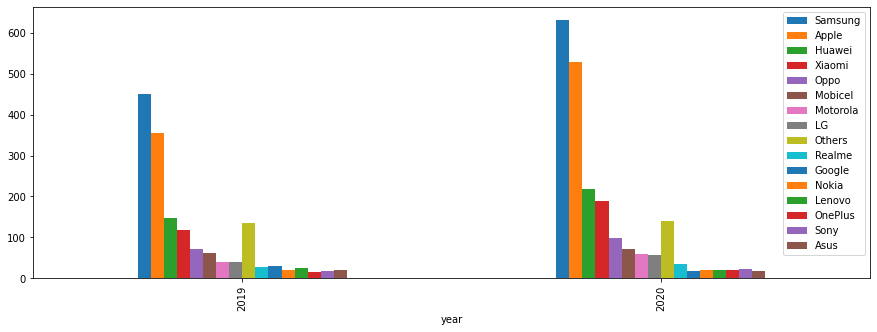

In [127]:
df.groupby('year').agg(np.mean).reset_index().plot.bar(x='year',figsize=(15,5))

## 7. 대한민국 출산율 (20점)

다음을 잘 읽고 적절한 시각화 플랏을 제시하라. (판다스 backend를 이용하여 시각화 하며, backend 엔진은 `matplotlib`, `plotly` 중 택하여 시각화)

`(1)` 아래는 "2020년 행정구역별 출생아 수, 출생률, 출산율 통계"를 나타낸 표이다. 행정구역별 출생자수를 pie chart로 시각화하라.

In [133]:
df1=pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')[17]
df1

,지역,출생아 수(천명),조출생률,합계출산율,거주인구(2021년 주민등록 인구)
0,서울,47.4,5.0,0.64,9588711
1,부산,15.1,4.5,0.75,3369704
2,대구,11.2,4.6,0.81,2406296
3,대전,7.5,5.1,0.81,1457619
4,광주,7.3,5.1,0.81,1444787
5,인천,16.0,5.5,0.83,2936214
6,경기도,77.8,5.9,0.88,13479798
7,전라북도,8.2,4.5,0.91,1796331
8,경상남도,16.8,5.1,0.95,3329623
9,충청북도,8.6,5.4,0.98,1596303


In [139]:
df1['지역']

0           서울
1           부산
2           대구
3           대전
4           광주
5           인천
6          경기도
7         전라북도
8         경상남도
9         충청북도
10          울산
11        경상북도
12         제주도
13        충청남도
14         강원도
15        전라남도
16          세종
17    대한민국(전체)
Name: 지역, dtype: object

In [142]:
df1['province']=['Seoul','Busan','Daegu','Daejeon','Gwangju','Incheon','Gyeonggi-do','Jeollabuk-do',
 'Gyeongsangnam-do','Chungcheongbuk-do','Ulsan','Gyeongsangbuk-do','Jeju-do','Chungcheongnam-do',
 'Gangwon-do','Jeollanam-do','Sejongsi','Total']

<AxesSubplot:ylabel='birth'>

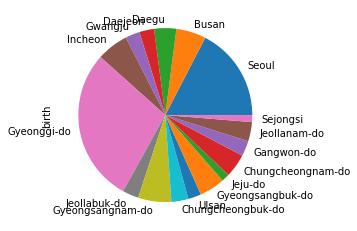

In [152]:
df1.iloc[:17,:].iloc[:,[1,5]].rename(columns={'출생아 수(천명)':'birth'}).set_index('province').\
plot.pie(y='birth',legend=False)

`(2)` 아래는 "2001-2019 지역별 합계출산율"을 정리한 데이터이다. (1)의 데이터프레임과 결합하여 "2001-2020 지역별 합계출산율" 데이터를 만들고 lineplot을 이용하여 시각화하라. (x축은 년도, y축은 합계출산율, 지역은 색깔로 구분하여 시각화할 것)

In [155]:
df2=pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')[18]
df2

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,전국,0.918,0.977,1.052,1.172,1.239,1.205,1.187,1.297,1.244,1.226,1.149,1.192,1.259,1.132,1.085,1.164,1.191,1.178,1.309
1,서울특별시,0.717,0.761,0.836,0.940,1.001,0.983,0.968,1.059,1.014,1.015,0.962,1.010,1.068,0.980,0.932,1.015,1.014,1.006,1.111
2,부산광역시,0.827,0.899,0.976,1.095,1.139,1.090,1.049,1.135,1.078,1.045,0.940,0.980,1.024,0.915,0.887,0.953,0.988,0.975,1.103
3,대구광역시,0.932,0.987,1.067,1.186,1.216,1.169,1.127,1.217,1.146,1.109,1.029,1.072,1.137,1.011,1.001,1.087,1.116,1.076,1.216
4,인천광역시,0.940,1.006,1.007,1.144,1.216,1.212,1.195,1.301,1.232,1.214,1.143,1.186,1.257,1.116,1.075,1.158,1.213,1.185,1.324
5,광주광역시,0.913,0.972,1.053,1.168,1.207,1.199,1.170,1.295,1.234,1.223,1.137,1.198,1.262,1.152,1.105,1.203,1.278,1.264,1.421
6,대전광역시,0.883,0.952,1.075,1.192,1.277,1.250,1.234,1.315,1.261,1.205,1.156,1.215,1.274,1.158,1.107,1.181,1.221,1.207,1.330
7,울산광역시,1.084,1.131,1.261,1.418,1.486,1.437,1.391,1.481,1.393,1.369,1.308,1.338,1.403,1.242,1.186,1.241,1.280,1.242,1.423
8,세종특별자치시,1.472,1.566,1.668,1.821,1.893,1.354,1.435,1.597,-,-,-,-,-,-,-,-,-,-,-
9,경기도,0.943,1.002,1.069,1.194,1.272,1.241,1.226,1.355,1.314,1.309,1.226,1.285,1.361,1.239,1.183,1.280,1.321,1.305,1.437


In [172]:
_df2=df2.replace('-','0').rename(columns={'Unnamed: 0':'지역'}).set_index('지역').applymap(lambda x: float(x)).\
reset_index().iloc[1:,:].sort_values('지역').reset_index(drop=True)
_df2

,지역,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,강원도,1.082,1.067,1.123,1.237,1.311,1.248,1.249,1.374,1.338,1.313,1.248,1.253,1.356,1.202,1.188,1.261,1.279,1.317,1.413
1,경기도,0.943,1.002,1.069,1.194,1.272,1.241,1.226,1.355,1.314,1.309,1.226,1.285,1.361,1.239,1.183,1.280,1.321,1.305,1.437
2,경상남도,1.046,1.122,1.227,1.358,1.437,1.409,1.367,1.503,1.446,1.413,1.323,1.368,1.434,1.254,1.189,1.266,1.290,1.272,1.417
3,경상북도,1.089,1.167,1.256,1.396,1.464,1.408,1.379,1.489,1.434,1.377,1.274,1.313,1.369,1.208,1.173,1.203,1.253,1.232,1.402
4,광주광역시,0.913,0.972,1.053,1.168,1.207,1.199,1.170,1.295,1.234,1.223,1.137,1.198,1.262,1.152,1.105,1.203,1.278,1.264,1.421
5,대구광역시,0.932,0.987,1.067,1.186,1.216,1.169,1.127,1.217,1.146,1.109,1.029,1.072,1.137,1.011,1.001,1.087,1.116,1.076,1.216
6,대전광역시,0.883,0.952,1.075,1.192,1.277,1.250,1.234,1.315,1.261,1.205,1.156,1.215,1.274,1.158,1.107,1.181,1.221,1.207,1.330
7,부산광역시,0.827,0.899,0.976,1.095,1.139,1.090,1.049,1.135,1.078,1.045,0.940,0.980,1.024,0.915,0.887,0.953,0.988,0.975,1.103
8,서울특별시,0.717,0.761,0.836,0.940,1.001,0.983,0.968,1.059,1.014,1.015,0.962,1.010,1.068,0.980,0.932,1.015,1.014,1.006,1.111
9,세종특별자치시,1.472,1.566,1.668,1.821,1.893,1.354,1.435,1.597,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [173]:
_df1=df1.iloc[:17,:].sort_values('지역').reset_index(drop=True).iloc[:,[0,3]].rename(columns={'합계출산율':'2020'})
_df1

,지역,2020
0,강원도,1.04
1,경기도,0.88
2,경상남도,0.95
3,경상북도,1.00
4,광주,0.81
5,대구,0.81
6,대전,0.81
7,부산,0.75
8,서울,0.64
9,세종,1.28


In [186]:
df3=pd.concat([_df1,_df2.iloc[:,1:]],axis=1).set_index('지역').applymap(lambda x: float(x)).reset_index()
df3

,지역,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,강원도,1.04,1.082,1.067,1.123,1.237,1.311,1.248,1.249,1.374,...,1.313,1.248,1.253,1.356,1.202,1.188,1.261,1.279,1.317,1.413
1,경기도,0.88,0.943,1.002,1.069,1.194,1.272,1.241,1.226,1.355,...,1.309,1.226,1.285,1.361,1.239,1.183,1.280,1.321,1.305,1.437
2,경상남도,0.95,1.046,1.122,1.227,1.358,1.437,1.409,1.367,1.503,...,1.413,1.323,1.368,1.434,1.254,1.189,1.266,1.290,1.272,1.417
3,경상북도,1.00,1.089,1.167,1.256,1.396,1.464,1.408,1.379,1.489,...,1.377,1.274,1.313,1.369,1.208,1.173,1.203,1.253,1.232,1.402
4,광주,0.81,0.913,0.972,1.053,1.168,1.207,1.199,1.170,1.295,...,1.223,1.137,1.198,1.262,1.152,1.105,1.203,1.278,1.264,1.421
5,대구,0.81,0.932,0.987,1.067,1.186,1.216,1.169,1.127,1.217,...,1.109,1.029,1.072,1.137,1.011,1.001,1.087,1.116,1.076,1.216
6,대전,0.81,0.883,0.952,1.075,1.192,1.277,1.250,1.234,1.315,...,1.205,1.156,1.215,1.274,1.158,1.107,1.181,1.221,1.207,1.330
7,부산,0.75,0.827,0.899,0.976,1.095,1.139,1.090,1.049,1.135,...,1.045,0.940,0.980,1.024,0.915,0.887,0.953,0.988,0.975,1.103
8,서울,0.64,0.717,0.761,0.836,0.940,1.001,0.983,0.968,1.059,...,1.015,0.962,1.010,1.068,0.980,0.932,1.015,1.014,1.006,1.111
9,세종,1.28,1.472,1.566,1.668,1.821,1.893,1.354,1.435,1.597,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [200]:
df3=df3.set_index('지역').T.reset_index().rename(columns={'index':'year'}).\
sort_values('year').reset_index(drop=True).set_index('year').T.reset_index()
df3

year,지역,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,강원도,1.413,1.317,1.279,1.261,1.188,1.202,1.356,1.253,1.248,...,1.338,1.374,1.249,1.248,1.311,1.237,1.123,1.067,1.082,1.04
1,경기도,1.437,1.305,1.321,1.280,1.183,1.239,1.361,1.285,1.226,...,1.314,1.355,1.226,1.241,1.272,1.194,1.069,1.002,0.943,0.88
2,경상남도,1.417,1.272,1.290,1.266,1.189,1.254,1.434,1.368,1.323,...,1.446,1.503,1.367,1.409,1.437,1.358,1.227,1.122,1.046,0.95
3,경상북도,1.402,1.232,1.253,1.203,1.173,1.208,1.369,1.313,1.274,...,1.434,1.489,1.379,1.408,1.464,1.396,1.256,1.167,1.089,1.00
4,광주,1.421,1.264,1.278,1.203,1.105,1.152,1.262,1.198,1.137,...,1.234,1.295,1.170,1.199,1.207,1.168,1.053,0.972,0.913,0.81
5,대구,1.216,1.076,1.116,1.087,1.001,1.011,1.137,1.072,1.029,...,1.146,1.217,1.127,1.169,1.216,1.186,1.067,0.987,0.932,0.81
6,대전,1.330,1.207,1.221,1.181,1.107,1.158,1.274,1.215,1.156,...,1.261,1.315,1.234,1.250,1.277,1.192,1.075,0.952,0.883,0.81
7,부산,1.103,0.975,0.988,0.953,0.887,0.915,1.024,0.980,0.940,...,1.078,1.135,1.049,1.090,1.139,1.095,0.976,0.899,0.827,0.75
8,서울,1.111,1.006,1.014,1.015,0.932,0.980,1.068,1.010,0.962,...,1.014,1.059,0.968,0.983,1.001,0.940,0.836,0.761,0.717,0.64
9,세종,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.597,1.435,1.354,1.893,1.821,1.668,1.566,1.472,1.28


In [204]:
fig=df3.melt(id_vars='지역').rename(columns={'variable':'year','value':'birth rate'}).\
plot.line(x='year', y='birth rate', color='지역', facet_col='지역', 
          facet_col_wrap=2, facet_col_spacing=0.04, backend='plotly', height=2000)
fig.update_yaxes(matches=None,showticklabels=True)
#fig.show(config=dict({'scrollZoom':False}))